step 1: Business Understanding

Our company is expanding into aviation operations and needs to make safe, cost-aware aircraft acquisition decisions. Leadership wants evidence-based guidance on which aircraft types/models are likely to present the lowest operational risk so the company can prioritize safer options for purchase and operation.

Stakeholders
Primary stakeholder: Head of Aviation Division / Executive Leadership responsible for fleet acquisition and safety policy.

Business Problem
Determine which aircraft types in the available accident dataset are associated with lower accident severity, so we can build a purchase shortlist and define risk-screening rules.

Project Objective
Use historical accident records to estimate and compare severity risk across aircraft types and produce actionable recommendations for aircraft acquisition.

Research Questions
1.Which aircraft types show the lowest severity outcomes in the dataset (e.g., lowest fatal accident rate and lowest average fatalities per accident)?
2. How does accident severity differ across damage categories (and does it vary by aircraft type)?
3. How has severity (fatal accident rate) changed over time overall and for common aircraft types?

Definition of “Risk” (Operationalized for this project)
Because true operational risk requires exposure data (e.g., flight hours), we will approximate risk using severity indicators available in the dataset:
Fatal accident flag
Fatal accident rate (by aircraft type)
Average fatalities per accident (by aircraft type)
Damage category patterns

Success Criteria
Produce a ranked list of aircraft types with clear severity metrics.
provide 3 business-ready recommendations supported by tables/visuals.
Document assumptions and limitations.



In [37]:
#impoting libraries and loading the data set
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df= pd.read_csv("flight.csv")
df.head()

,Unnamed: 0,acc.date,type,reg,operator,fat,location,dmg
0,0,3 Jan 2022,British Aerospace 4121 Jetstream 41,ZS-NRJ,SA Airlink,0,near Venetia Mine Airport,sub
1,1,4 Jan 2022,British Aerospace 3101 Jetstream 31,HR-AYY,LANHSA - Línea Aérea Nacional de Honduras S.A,0,Roatán-Juan Manuel Gálvez International Airpor...,sub
2,2,5 Jan 2022,Boeing 737-4H6,EP-CAP,Caspian Airlines,0,Isfahan-Shahid Beheshti Airport (IFN),sub
3,3,8 Jan 2022,Tupolev Tu-204-100C,RA-64032,"Cainiao, opb Aviastar-TU",0,Hangzhou Xiaoshan International Airport (HGH),w/o
4,4,12 Jan 2022,Beechcraft 200 Super King Air,NaN,private,0,"Machakilha, Toledo District, Grahem Creek area",w/o


Dataset used:'flight.csv' (accident records with fields such as date, aircraft type, operator, fatalities, location, damage).


Dtep 2: Data Understanding

Dataset overview
Rows: 2,500
Columns: 8
Columns: 'unnamed: 0', 'acc.date', 'type', 'reg', 'operator', 'fat', 'location', 'dmg'

Data types (initial)
'acc.date' is stored as text (object) and must be parsed to a datetime for time-based analysis.
'fat' is stored as text (object) and must be converted to numeric to compute fatality-based metrics.
Most other fields are categorical/text features used for grouping and filtering.

Missing values
Missingness is low overall:
'reg': 3.68% missing
'operator': 0.56% missing
'fat': 0.48% missing
All other columns: 0% missing

In [38]:
df.shape

(2500, 8)

In [39]:
df.head(10)

,Unnamed: 0,acc.date,type,reg,operator,fat,location,dmg
0,0,3 Jan 2022,British Aerospace 4121 Jetstream 41,ZS-NRJ,SA Airlink,0,near Venetia Mine Airport,sub
1,1,4 Jan 2022,British Aerospace 3101 Jetstream 31,HR-AYY,LANHSA - Línea Aérea Nacional de Honduras S.A,0,Roatán-Juan Manuel Gálvez International Airpor...,sub
2,2,5 Jan 2022,Boeing 737-4H6,EP-CAP,Caspian Airlines,0,Isfahan-Shahid Beheshti Airport (IFN),sub
3,3,8 Jan 2022,Tupolev Tu-204-100C,RA-64032,"Cainiao, opb Aviastar-TU",0,Hangzhou Xiaoshan International Airport (HGH),w/o
4,4,12 Jan 2022,Beechcraft 200 Super King Air,NaN,private,0,"Machakilha, Toledo District, Grahem Creek area",w/o
5,5,16 Jan 2022,Airbus A320-214 (WL),JA24MC,Star Flyer,0,near Okayama City,non
6,6,19 Jan 2022,Cessna 208B Grand Caravan EX,YV3033,Mahan Air,0,"near Vakilabad, Arzuiyeh",sub
7,7,22 Jan 2022,Airbus A320-232,N760JB,JetBlue Airways,0,"Hayden-Yampa Valley Airport, CO (HDN)",sub
8,8,27 Jan 2022,Bombardier CL-600-2B16 Challenger 604,2-SLOW,Volare Aviation,0,Heraklion-N. Kazantzakis Airport (HER/LGIR),sub
9,9,31 Jan 2022,Bombardier CL-600-2B16 Challenger 604,N999PX,Lima Delta Co Trustee,0,London-Stansted Airport (STN),sub


In [40]:
df.columns

Index(['Unnamed: 0', 'acc.date', 'type', 'reg', 'operator', 'fat', 'location',
       'dmg'],
      dtype='object')

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  2500 non-null   int64 
 1   acc.date    2500 non-null   object
 2   type        2500 non-null   object
 3   reg         2408 non-null   object
 4   operator    2486 non-null   object
 5   fat         2488 non-null   object
 6   location    2500 non-null   object
 7   dmg         2500 non-null   object
dtypes: int64(1), object(7)
memory usage: 156.4+ KB


In [42]:
missing = (df.isna().mean() * 100).sort_values(ascending=False)
missing.to_frame("missing_%").head(20)

,missing_%
reg,3.68
operator,0.56
fat,0.48
Unnamed: 0,0.00
acc.date,0.00
type,0.00
location,0.00
dmg,0.00


Step 3: Data Preparation

This step cleans and transforms the raw 'flight.csv' data into analysis-ready features (dates, numeric fatalities, standardized damage categories).

3.1 Structural cleanup Dropped 'Unnamed:0' because it is an exported index column and does not carry analytical meaning. Standardized column names and renamed 'acc.date' to 'acc_date'.

3.2 Date parsing + time feature Converted 'acc_date' from text to datetime. Created 'year' as 'acc_date.dt.year' for time-based summaries.

Data quality note: 6 records have invalid/unparseable 'acc_date', so 'acc_date' and 'year' are missing for those rows. These records are retained in the dataset but excluded from analyses that require a year.

3.3 Fatalities cleaning + severity flag Converted 'fat' (fatalities) from text to numeric. Created: 'is_fatal_strict' = ('fat' > 0) for fatal vs. non-fatal classification 'fat_missing' to track missing fatality counts 'is_fatal_known' = ('fat' is not missing) to define valid denominators for fatal-rate calculations

Data quality note:50 records have missing 'fat'. These are kept, but fatality-rate calculations use only rows where 'is_fatal_known = True' (n = 2,450) to avoid treating unknown fatalities as zero.

3.4 Standardize aircraft damage categories The raw 'dmg' column uses abbreviated codes. These were mapped into human-readable categories:

non' to No damage
'min' to Minor damage
'sub' to Substantial damage
'w/o' to Written off
'unk' to Unknown
'mis' to Missing

After mapping, the damage category distribution is: Substantial damage: 1330 Written off: 702 No damage: 338 Minor damage: 98 Unknown: 30 Missing: 2

In [43]:
df = df.drop(columns=["Unnamed: 0"])
df.columns = df.columns.str.strip().str.lower().str.replace(" ", "_")
df.columns

Index(['acc.date', 'type', 'reg', 'operator', 'fat', 'location', 'dmg'], dtype='object')

In [44]:
df = df.rename(columns={"acc.date": "acc_date"})
df.columns

Index(['acc_date', 'type', 'reg', 'operator', 'fat', 'location', 'dmg'], dtype='object')

In [45]:
df["acc_date"] = pd.to_datetime(df["acc_date"], errors="coerce", dayfirst=True)
df["year"] = df["acc_date"].dt.year

df[["acc_date", "year"]].head()





,acc_date,year
0,2022-01-03,2022.0
1,2022-01-04,2022.0
2,2022-01-05,2022.0
3,2022-01-08,2022.0
4,2022-01-12,2022.0


In [46]:
df["fat"] = pd.to_numeric(df["fat"], errors="coerce")
df["fat"].describe()


count    2450.000000
mean        1.860408
std        13.182859
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max       257.000000
Name: fat, dtype: float64

In [47]:
df["is_fatal"] = df["fat"].fillna(0).gt(0)
df["is_fatal"].value_counts(dropna=False)

is_fatal
False    2118
True      382
Name: count, dtype: int64

In [48]:
df["dmg"].value_counts(dropna=False)

dmg
sub    1330
w/o     702
non     338
min      98
unk      30
mis       2
Name: count, dtype: int64

In [49]:
# Cleaning the raw strings
df["dmg"] = df["dmg"].astype(str).str.strip().str.lower()

dmg_map = {
    "non": "No damage",
    "min": "Minor damage",
    "sub": "Substantial damage",
    "w/o": "Written off",
    "unk": "Unknown",
    "mis": "Missing"
}

df["dmg_cat"] = df["dmg"].map(dmg_map).fillna("Other/Unmapped")
df[["dmg", "dmg_cat"]].head(10)


,dmg,dmg_cat
0,sub,Substantial damage
1,sub,Substantial damage
2,sub,Substantial damage
3,w/o,Written off
4,w/o,Written off
5,non,No damage
6,sub,Substantial damage
7,sub,Substantial damage
8,sub,Substantial damage
9,sub,Substantial damage


In [50]:
df["dmg_cat"].value_counts(dropna=False)

dmg_cat
Substantial damage    1330
Written off            702
No damage              338
Minor damage            98
Unknown                 30
Missing                  2
Name: count, dtype: int64

In [51]:
# Any dates that failed parsing?
df["acc_date"].isna().sum(), df["year"].isna().sum()

(6, 6)

In [52]:
# Any fatalities that are missing after numeric conversion?
df["fat"].isna().sum()

50

In [53]:
df["fat_missing"] = df["fat"].isna()
df["is_fatal_known"] = df["fat"].notna()
df["is_fatal_strict"] = df["fat"].gt(0)  # will be NaN where fat is missing
df[["fat", "fat_missing", "is_fatal_strict"]].head(10)

,fat,fat_missing,is_fatal_strict
0,0.0,False,False
1,0.0,False,False
2,0.0,False,False
3,0.0,False,False
4,0.0,False,False
5,0.0,False,False
6,0.0,False,False
7,0.0,False,False
8,0.0,False,False
9,0.0,False,False


In [54]:
df["fat_missing"].value_counts()
df["is_fatal_known"].value_counts()

is_fatal_known
True     2450
False      50
Name: count, dtype: int64

In [55]:
df_known = df[df["is_fatal_known"]].copy()
df_year  = df[df["year"].notna()].copy()  # for time trends (since 6 dates are missing)

In [56]:
#RQ1:Which aircraft types show the lowest severity outcomes in the dataset (e.g., lowest fatal accident rate and lowest average fatalities per accident)? 
min_n = 20  # only rank aircraft types with at least this many accidents
d = df[df["fat"].notna()].copy()
d_year = d[d["year"].notna()].copy()

print("Rows total:", len(df))
print("Rows used for fatal-rate metrics (fat known):", len(d))
print("Rows excluded (fat missing):", df["fat"].isna().sum())
print("Rows excluded from year-trends (year missing):", df["year"].isna().sum())

type_table = (
    d.groupby("type")
     .agg(accidents=("type", "size"),
          fatal_rate=("is_fatal_strict", "mean"),
          avg_fat=("fat", "mean"))
)

type_table = type_table[type_table["accidents"] >= min_n].sort_values(["fatal_rate", "avg_fat"])

print("\nRQ1: Lowest severity aircraft types (min accidents =", min_n, ")")
print((type_table.head(10).assign(fatal_rate_pct=lambda x: (x["fatal_rate"]*100).round(2))
      ).drop(columns="fatal_rate"))

Rows total: 2500
Rows used for fatal-rate metrics (fat known): 2450
Rows excluded (fat missing): 50
Rows excluded from year-trends (year missing): 6

RQ1: Lowest severity aircraft types (min accidents = 20 )
                                          accidents   avg_fat  fatal_rate_pct
type                                                                         
Airbus A320-214                                  20  0.000000            0.00
Airbus A320-232                                  24  0.000000            0.00
Boeing 737-8AS (WL)                              24  0.000000            0.00
Beechcraft B200 Super King Air                   22  0.090909            9.09
de Havilland Canada DHC-8-402Q Dash 8            28  3.714286           14.29
Antonov An-2                                     26  0.461538           15.38
Beechcraft 200 Super King Air                    58  0.275862           17.24
de Havilland Canada DHC-6 Twin Otter 300         34  2.529412           17.65
Cessna 208B 

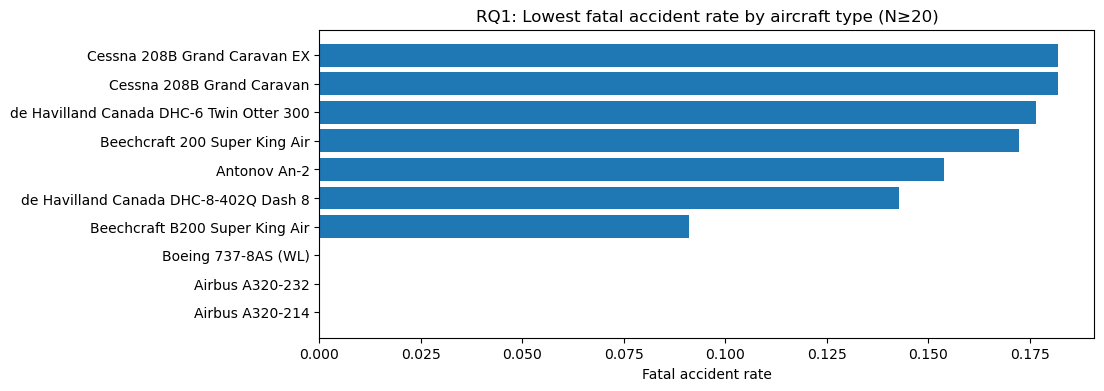

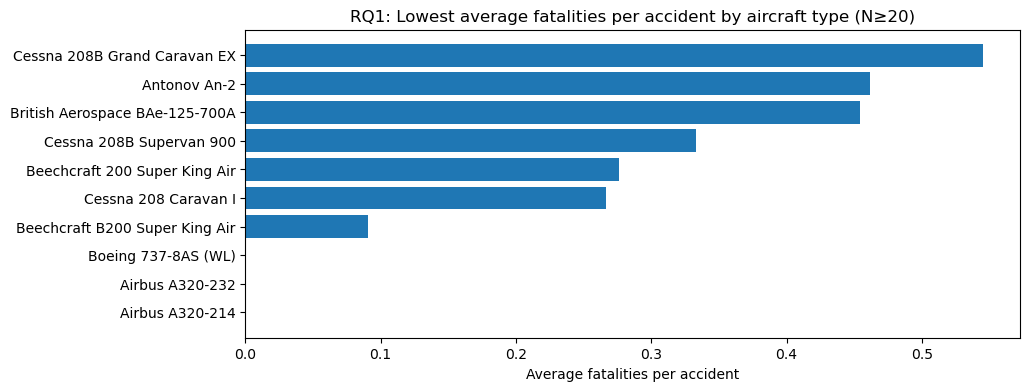

In [57]:
min_n = 20

# summary by aircraft type
g = d.groupby("type").agg(
    n=("type", "size"),
    fatal_rate=("is_fatal_strict", "mean"),
    avg_fat=("fat", "mean")
)

g = g[g["n"] >= min_n]

# 1) lowest fatal accident rate (top 10)
a = g.sort_values("fatal_rate").head(10)
plt.figure(figsize=(10,4))
plt.barh(a.index, a["fatal_rate"])
plt.title("RQ1: Lowest fatal accident rate by aircraft type (N≥20)")
plt.xlabel("Fatal accident rate")
plt.show()

# 2) lowest average fatalities per accident (top 10)
b = g.sort_values("avg_fat").head(10)
plt.figure(figsize=(10,4))
plt.barh(b.index, b["avg_fat"])
plt.title("RQ1: Lowest average fatalities per accident by aircraft type (N≥20)")
plt.xlabel("Average fatalities per accident")
plt.show()



In [58]:
# RQ2: How does accident severity differ across damage categories (and does it vary by aircraft type)? 
dmg_table = (
    d.groupby("dmg_cat")
     .agg(accidents=("dmg_cat", "size"),
          fatal_rate=("is_fatal_strict", "mean"),
          avg_fat=("fat", "mean"))
     .sort_values("fatal_rate", ascending=False)
)

print("\nRQ2: Severity by damage category")
print(dmg_table.assign(fatal_rate_pct=(dmg_table["fatal_rate"]*100).round(2)).drop(columns="fatal_rate"))



RQ2: Severity by damage category
                    accidents   avg_fat  fatal_rate_pct
dmg_cat                                                
Written off               674  6.640950           52.23
Minor damage               94  0.021277            2.13
Substantial damage       1318  0.059181            1.97
No damage                 334  0.005988            0.60
Unknown                    30  0.000000            0.00


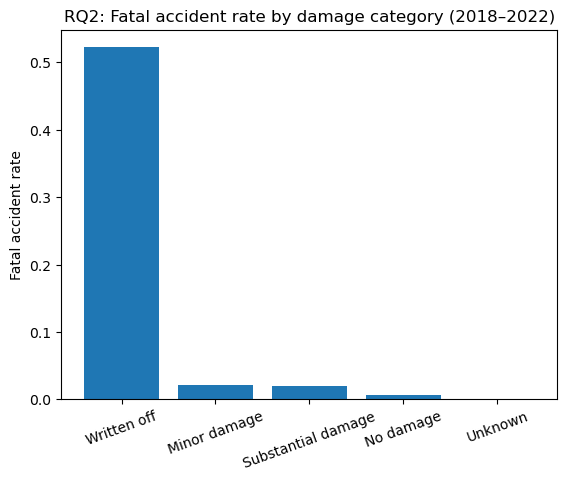

In [59]:
# A) Severity by damage category (fatal accident rate)
x = d.groupby("dmg_cat")["is_fatal_strict"].mean().sort_values(ascending=False)
plt.bar(x.index, x.values)
plt.title("RQ2: Fatal accident rate by damage category (2018–2022)")
plt.ylabel("Fatal accident rate")
plt.xticks(rotation=20)
plt.show()

In [60]:
# RQ3: How has severity (fatal accident rate) changed over time overall and for common aircraft types?
year_table = (
    d_year.groupby("year")
          .agg(accidents=("year", "size"),
               fatal_rate=("is_fatal_strict", "mean"),
               avg_fat=("fat", "mean"))
          .sort_index()
)

print("\nRQ3: Yearly trend (fatal rate % and avg fatalities)")
print(year_table.assign(fatal_rate_pct=(year_table["fatal_rate"]*100).round(2)).drop(columns="fatal_rate"))


RQ3: Yearly trend (fatal rate % and avg fatalities)
        accidents   avg_fat  fatal_rate_pct
year                                       
2018.0        556  3.460432           14.75
2019.0        580  1.448276           16.21
2020.0        460  1.452174           14.78
2021.0        424  1.278302           17.45
2022.0        424  1.353774           14.62


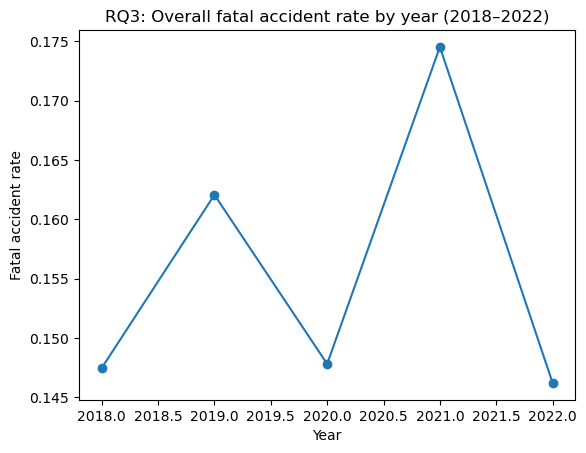

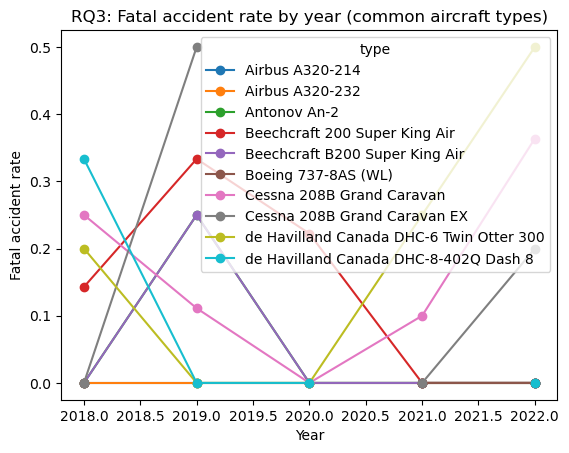

In [61]:
#A) Overall fatal accident rate by year
y = d.groupby("year")["is_fatal_strict"].mean()
plt.plot(y.index, y.values, marker="o")
plt.title("RQ3: Overall fatal accident rate by year (2018–2022)")
plt.xlabel("Year")
plt.ylabel("Fatal accident rate")
plt.show()

#B) Fatal accident rate by type
types = ["Airbus A320-214", "Airbus A320-232", "Boeing 737-8AS (WL)" , "Beechcraft B200 Super King Air", "de Havilland Canada DHC-8-402Q Dash 8", "Antonov An-2" , "Beechcraft 200 Super King Air", "de Havilland Canada DHC-6 Twin Otter 300", "Cessna 208B Grand Caravan EX", "Cessna 208B Grand Caravan"]
d2 = d[d["type"].isin(types)]
p = d2.groupby(["year", "type"])["is_fatal_strict"].mean().unstack()
p.plot(marker="o")
plt.title("RQ3: Fatal accident rate by year (common aircraft types)")
plt.xlabel("Year")
plt.ylabel("Fatal accident rate")
plt.show()



Using only accidents with known fatality counts (n=2,450), aircraft types were ranked by fatal accident rate and average fatalities (minimum 20 accidents per type). The lowest-severity types in the dataset were Airbus A320-214, Airbus A320-232, and Boeing 737-8AS (WL), each with a 0% fatal accident rate in the sample. Damage level is strongly associated with severity: “Written off” accidents have a 52.23% fatal accident rate and an average of 6.64 fatalities, far higher than other damage categories. Over 2018–2022, fatal accident rates ranged between 14.6% and 17.5% without a consistent trend, with 2021 showing the highest fatal accident rate.